In [1]:
import fiona
import geopandas as gpd
import pandas as pd
import shapely
from shapely import geometry
import json
import googlemaps
import time
from IPython.core.display import display, HTML
from IPython.display import IFrame
import re
from functools import partial
import ast 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [50]:
places_df = pd.read_csv('../data/places_GP.csv')

# Распределение категорий по среднему рейтингу

Text(0, 0.5, 'Средний нормализованный рейтинг')

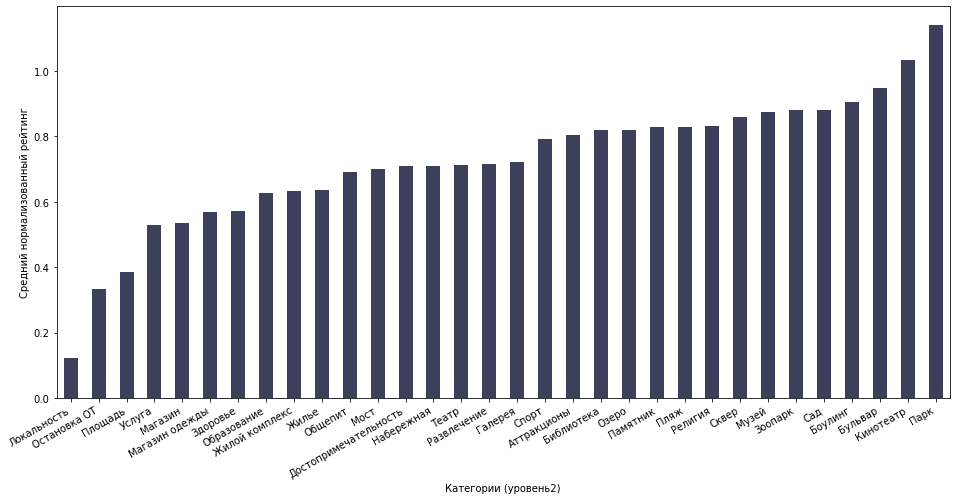

In [41]:
places_df.groupby('category_2').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')

Text(0, 0.5, 'Средний нормализованный рейтинг')

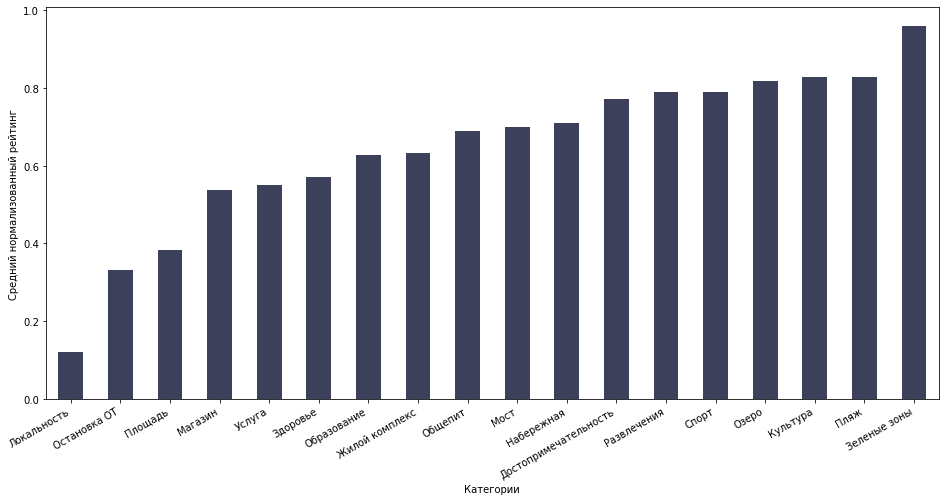

In [42]:
places_df.groupby('category').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')

# Распределение мест по рейтингу и категориям

In [43]:
places_df.sort_values('normalized_rating', ascending = False)[:20].category.drop_duplicates()

1609     Зеленые зоны
1616            Спорт
15425         Магазин
2740      Развлечения
15233            Мост
Name: category, dtype: object

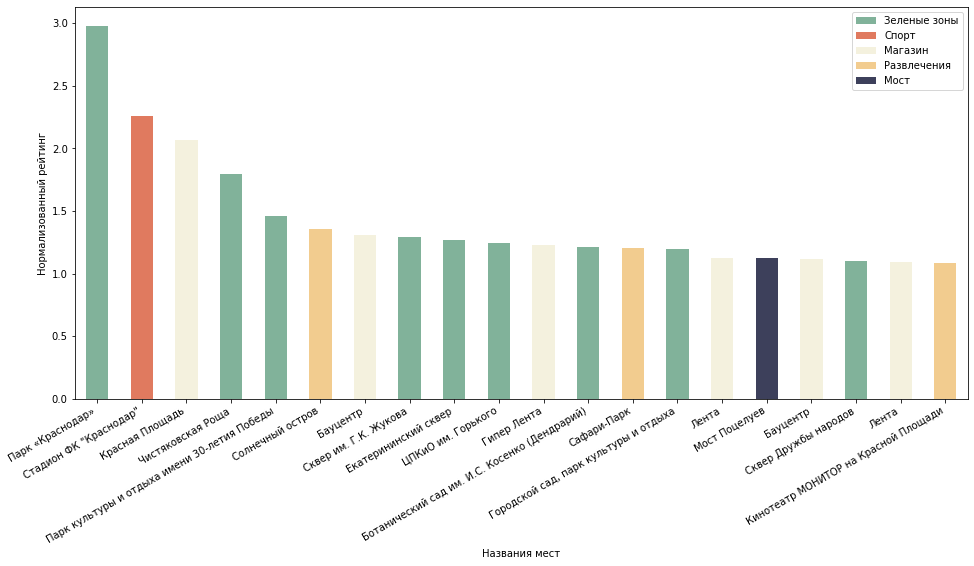

In [44]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Магазин": "#F4F1DE", "Развлечения":"#F2CC8F", 'Мост':'#3D405B'}
plot_df = places_df.sort_values('normalized_rating', ascending = False)[:20]

plot_df.set_index('title')['normalized_rating'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')

legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

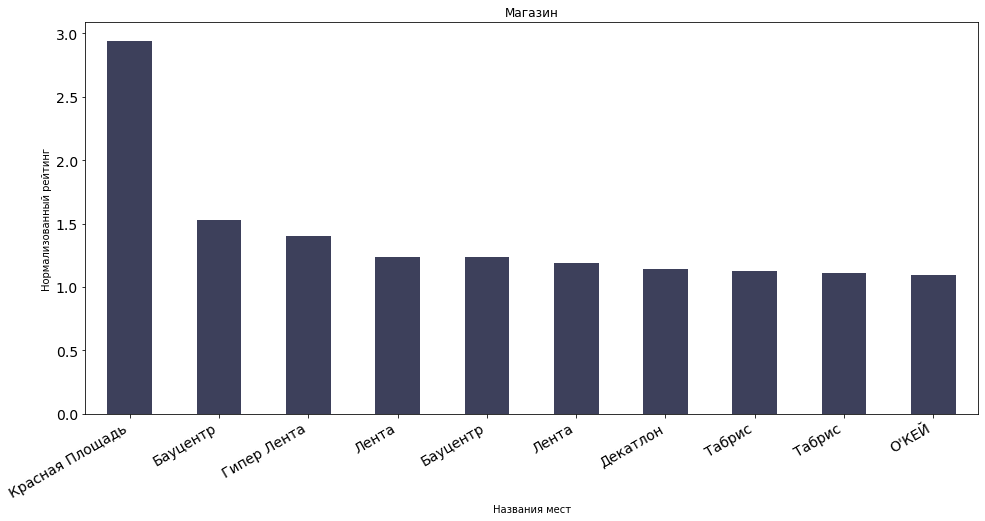

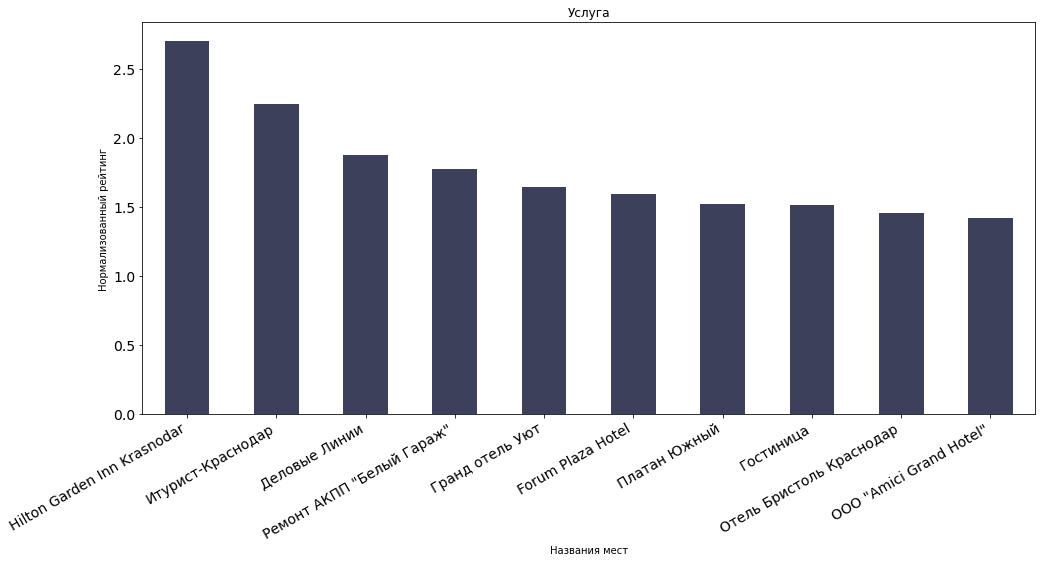

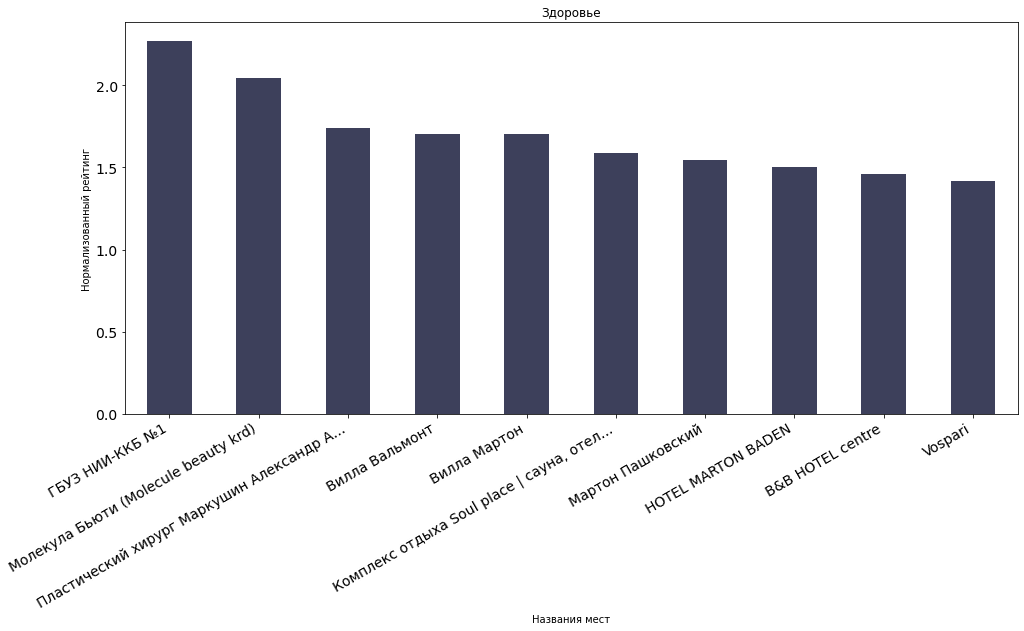

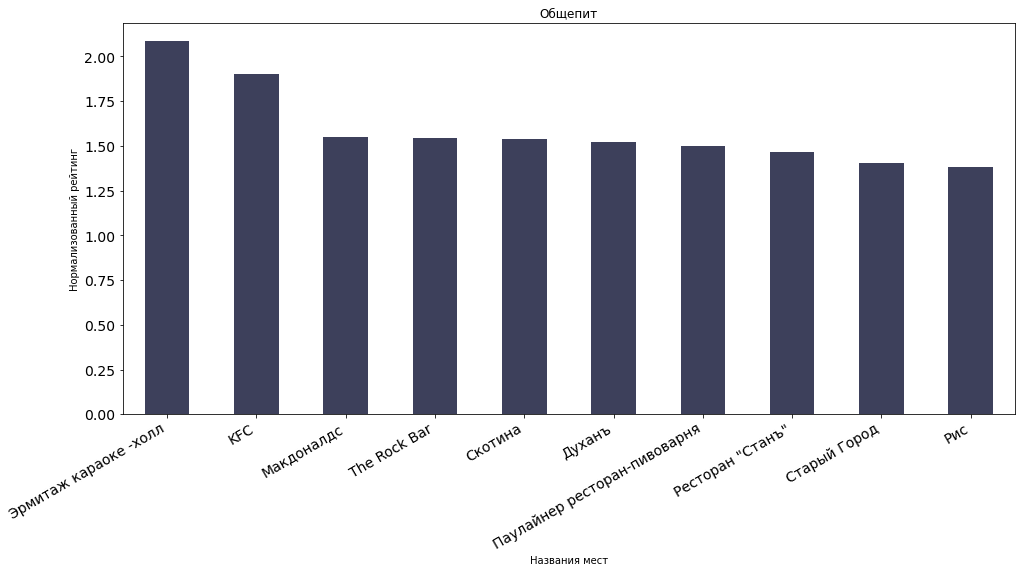

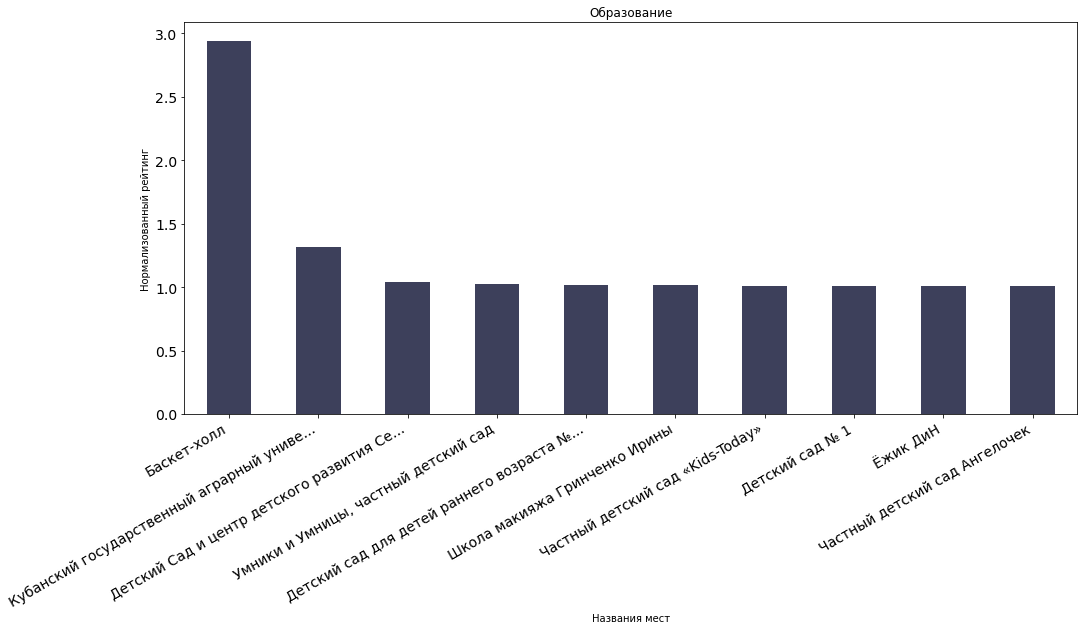

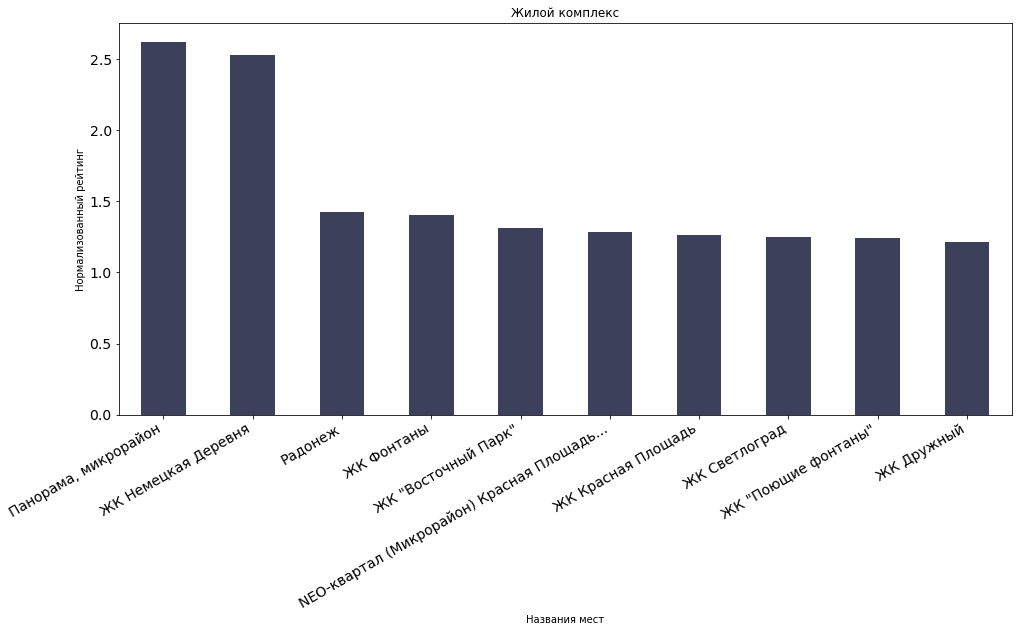

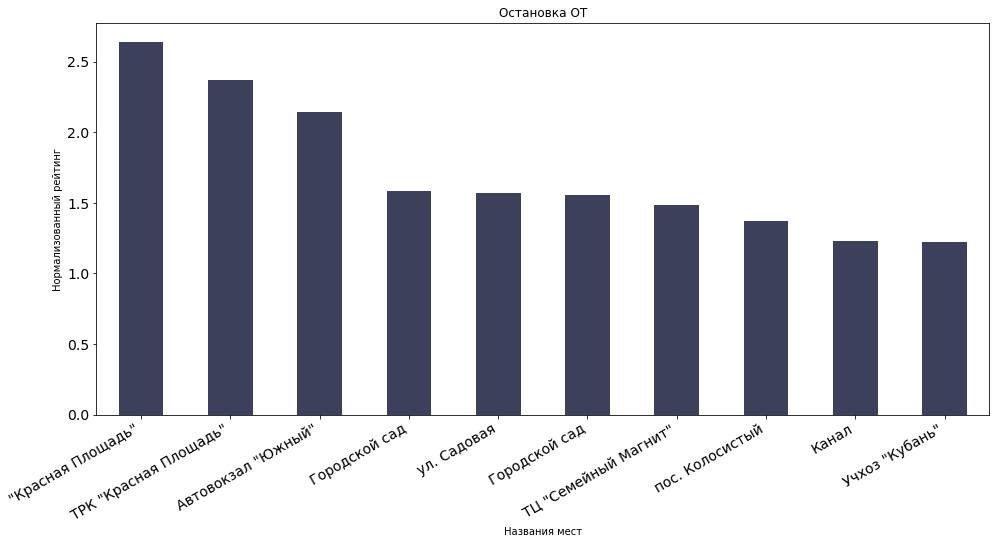

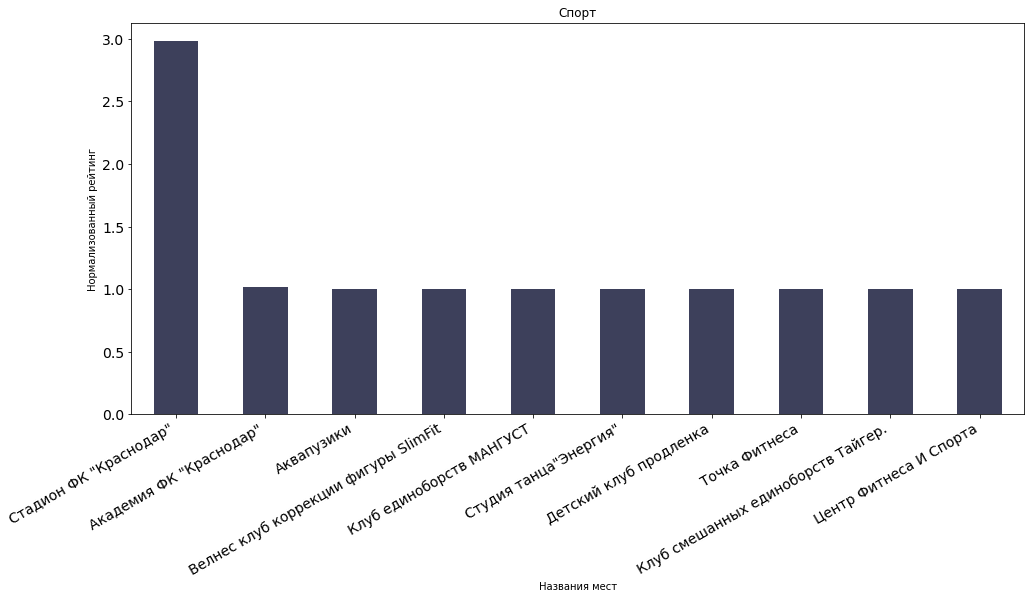

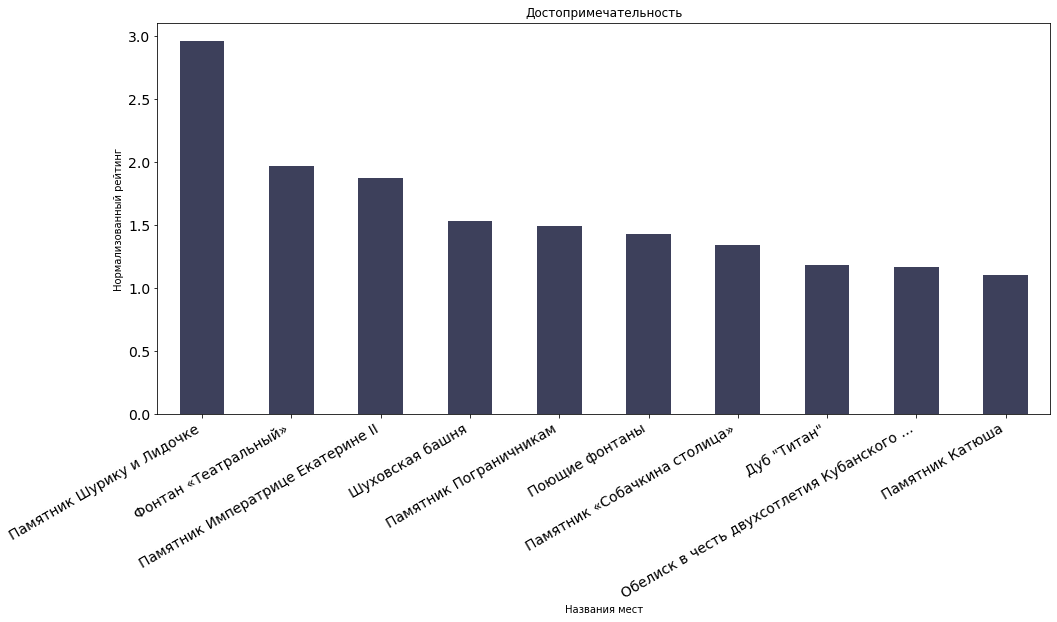

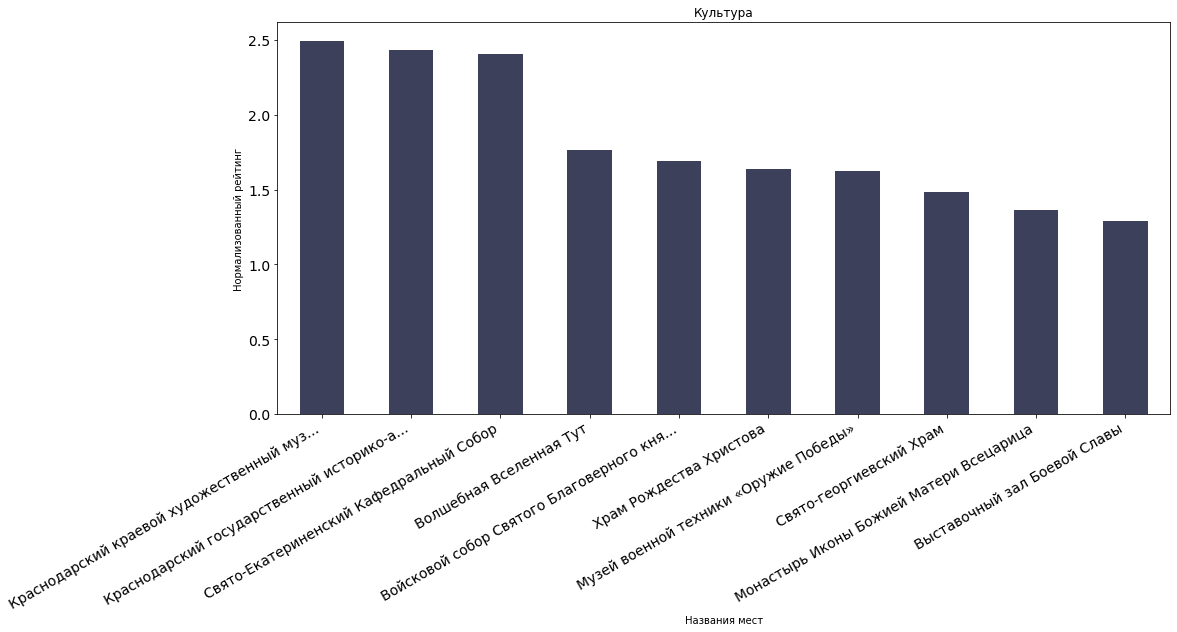

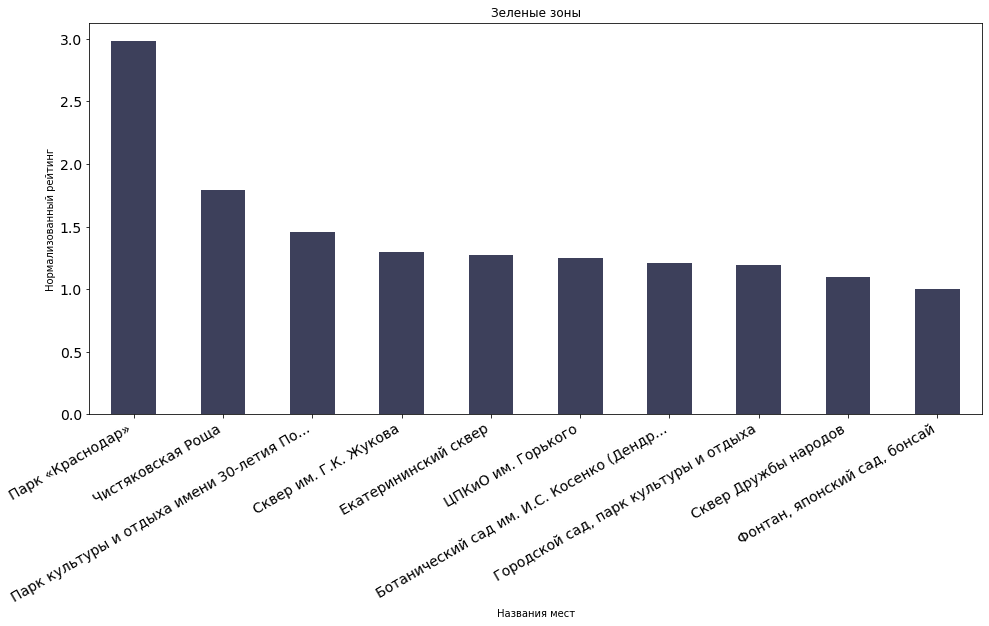

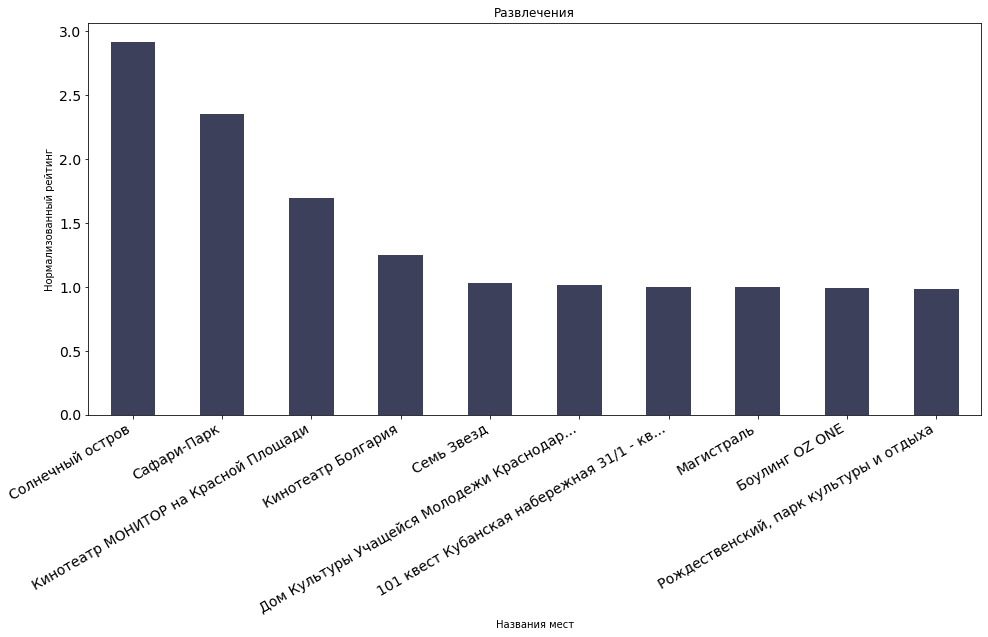

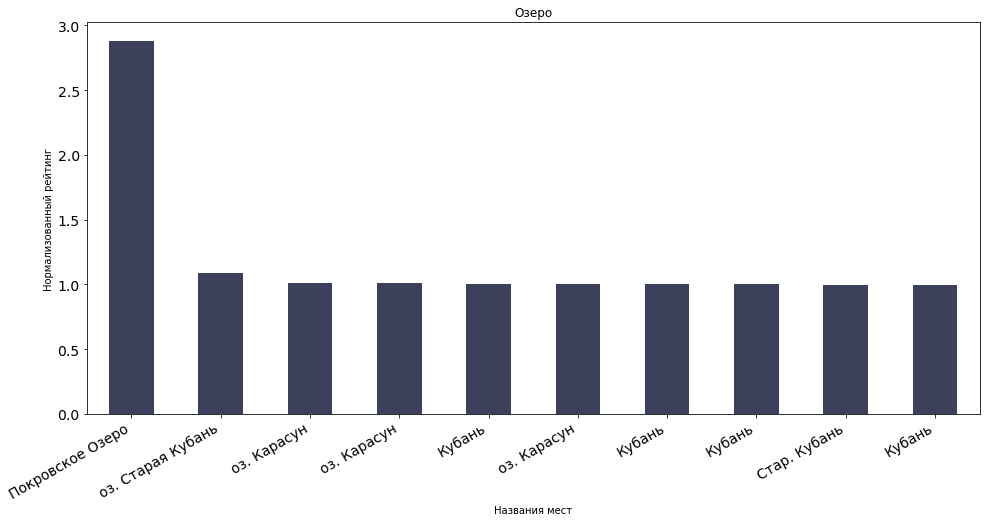

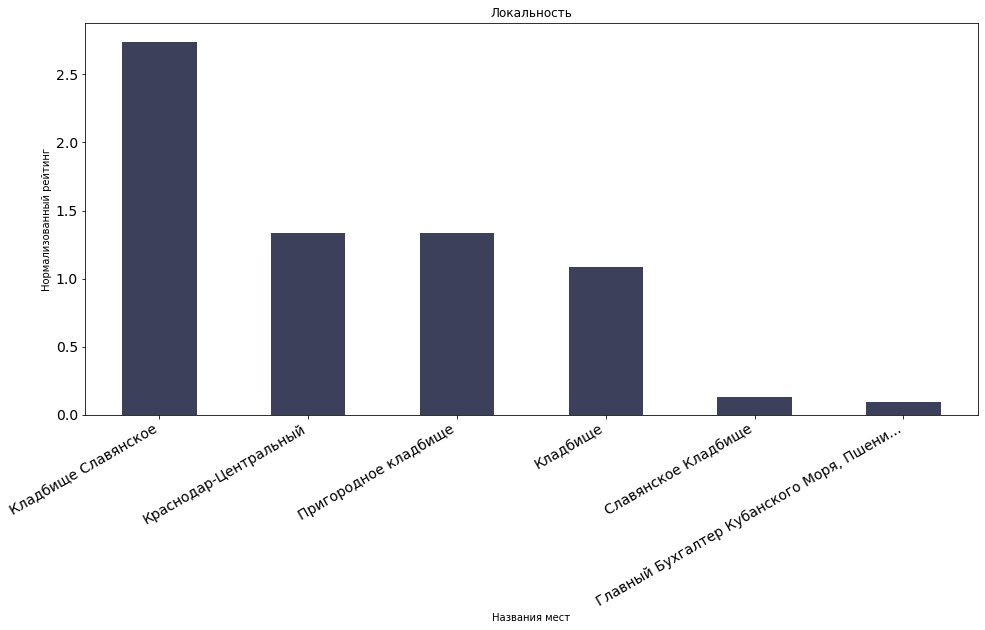

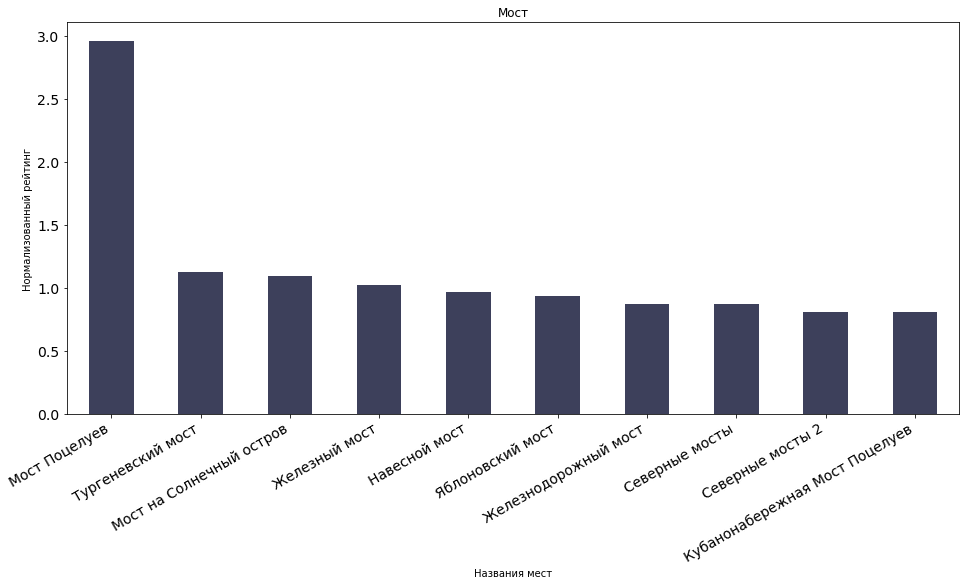

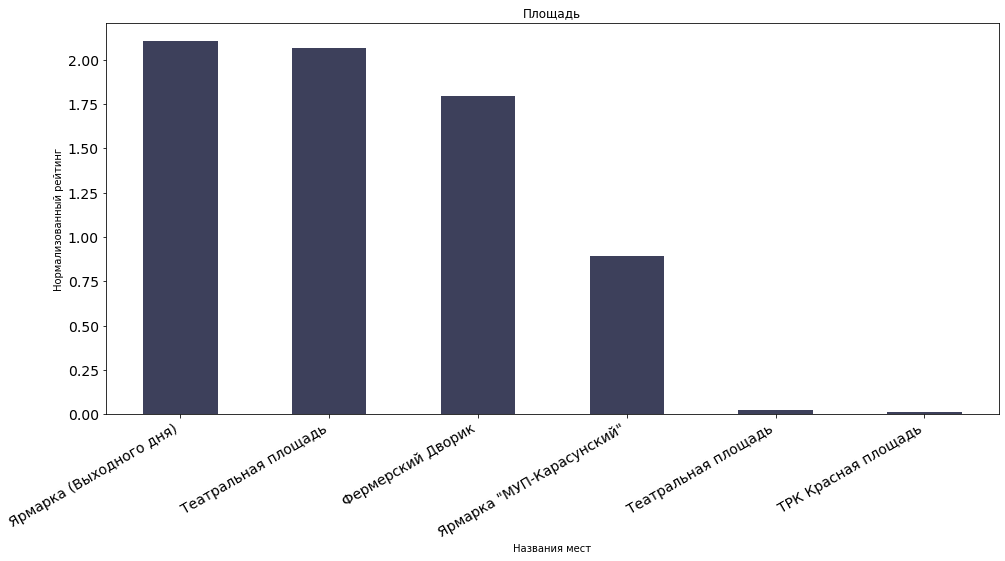

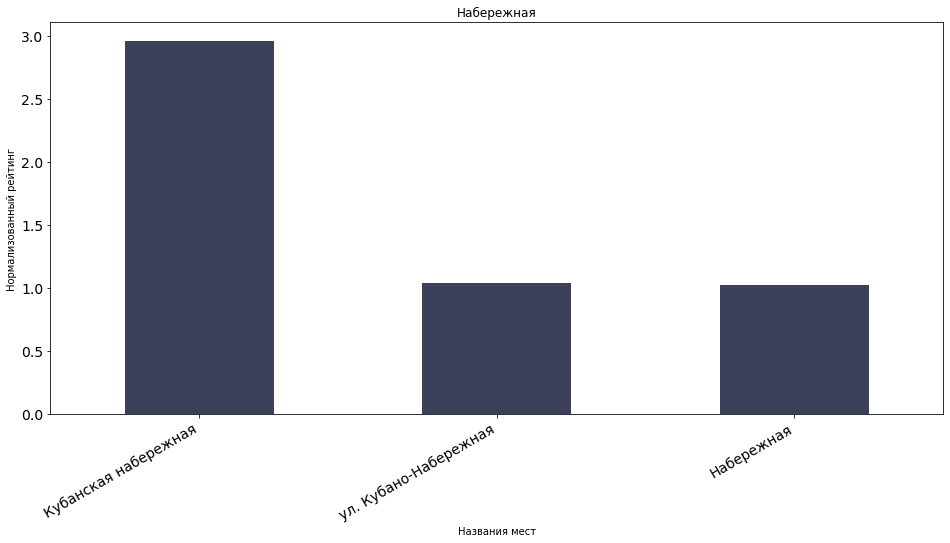

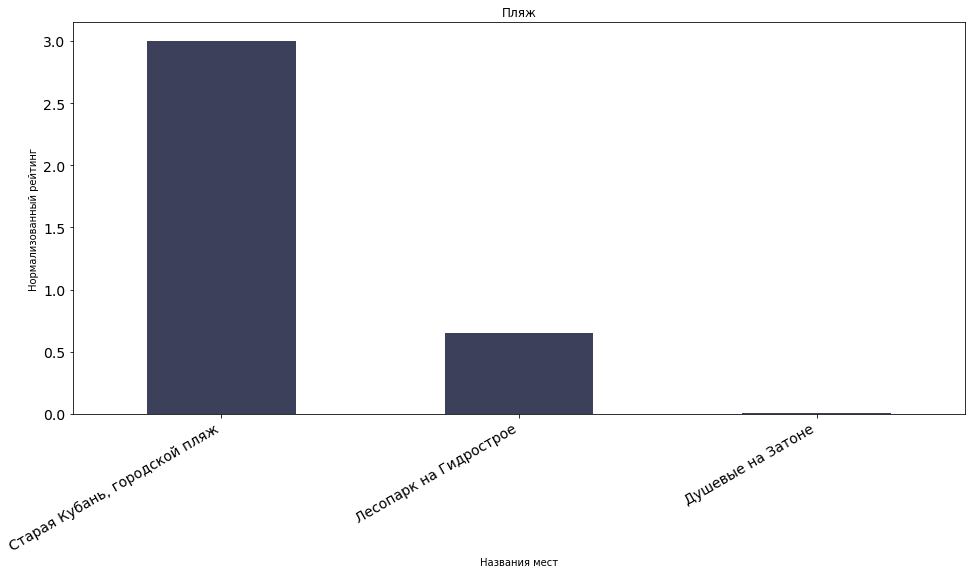

In [52]:
list_top=[]
for i in places_df.category.value_counts().keys():
    plot_df = places_df.loc[(places_df.category==i)&places_df.rating_by_category!=0].sort_values('rating_by_category', ascending = False)[:10]
    list_top.append(plot_df)
    plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
    
    plot_df.set_index('title')['rating_by_category'].plot.bar(color ="#3D405B" , figsize = (16, 8), fontsize=14)
    plt.title(i)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Названия мест')
    plt.ylabel('Нормализованный рейтинг')
    plt.show()

# Определение улиц с большим числом категории еда

In [46]:
food_streets = places_df.loc[places_df.types.str.contains('food'), 'address'].str.split(',').explode().str.lower().str.strip().value_counts().reset_index()

In [47]:
food_streets.loc[(~food_streets['index'].str.contains('ул')) & (~food_streets['index'].str.isnumeric())][3:40]

,index,address
56,знаменский,11
85,свх краснодарский 4 отделение,7
100,кружевная,6
113,колосистый,5
119,пр. чекистов,5
127,пр. репина,5
143,южный,4
144,unnamed road,4
149,2/1,4
153,к,4


In [48]:
food_streets = places_df.loc[places_df.types.str.contains('restaurant'), 'address'].str.split(',').explode().str.lower().str.strip().value_counts().reset_index()
food_streets.loc[(~food_streets['index'].str.contains('ул')) & (~food_streets['index'].str.isnumeric())][3:40]

,index,address
83,37/3,2
106,2 б,2
111,7/2,1
113,18/2,1
123,н,1
131,мкц кристалл,1
133,4 этаж,1
134,123/5,1
136,178-182,1
137,2/2,1


<AxesSubplot:>

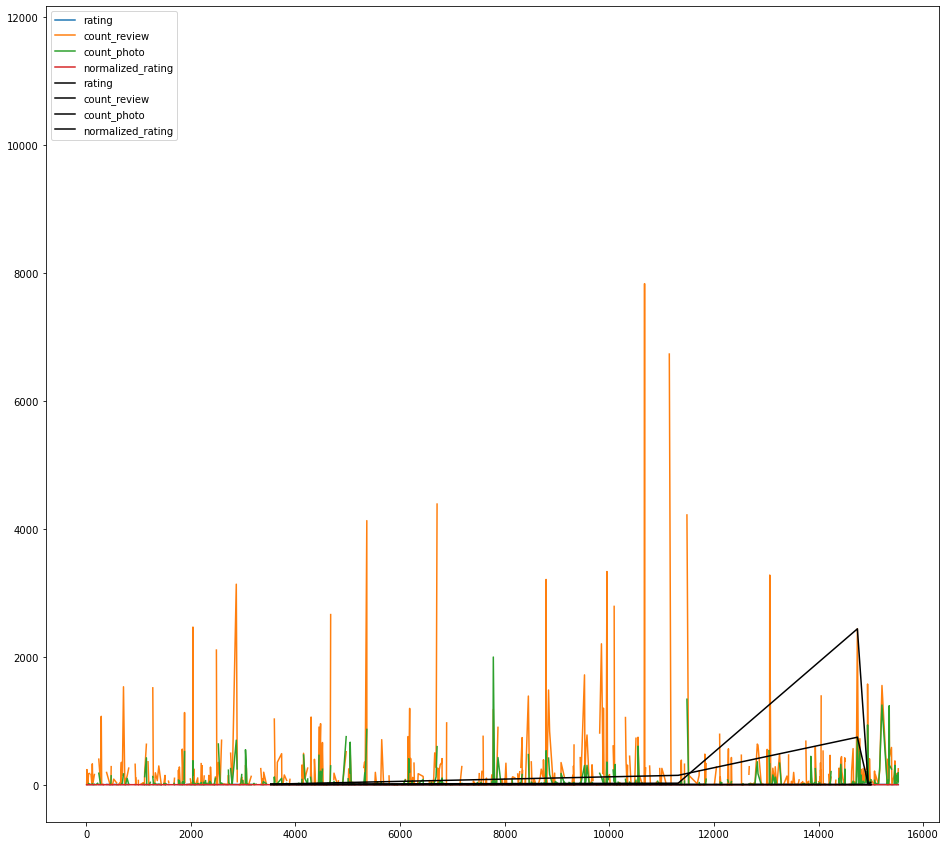

In [49]:
ax = places_df.loc[places_df.types.str.contains('food')].plot(figsize = (16, 15))
places_df.loc[(places_df.types.str.contains('food')) &places_df.address.str.lower().str.contains('чекистов')].plot(ax = ax, color = 'k')

In [49]:
places_df.loc[(places_df.types.str.contains('restaurant'))|\
              (places_df.types.str.contains('cafe'))|\
              (places_df.types.str.contains('bar'))]

,url,title,address,category,popular_times_bars,geometry,types,rating,user_ratings_total,count_photo,new_category
66,https://www.google.com/maps/place/?q=place_id:...,Шашлычный двор,"ул. Тюляева, 43, Краснодар, Краснодарский край...",Ресторан,NaN,POINT (39.0960469 45.0396082),"['restaurant', 'food', 'point_of_interest', 'e...",4.2,176.0,10,
132,https://www.google.com/maps/place/?q=place_id:...,KFC,"ул. Александра Покрышкина, д. 3, Краснодар, Кр...",Фастфуд,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9497861 45.1079132),"['restaurant', 'food', 'point_of_interest', 'e...",2.3,27.0,3,
168,https://www.google.com/maps/place/?q=place_id:...,Палитра Суши,"Кружевная, 5, Краснодар, Краснодарский край, 3...",Суши,NaN,POINT (39.06545699999999 44.99295389999999),"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,
169,https://www.google.com/maps/place/?q=place_id:...,Flat White Flat,"Конгрессная, 23, Краснодар, Краснодарский край...",Кофейня,NaN,POINT (38.9624194 45.1072286),"['cafe', 'food', 'point_of_interest', 'store',...",4.5,2.0,NaN,
199,https://www.google.com/maps/place/?q=place_id:...,RAI-SPA,NaN,,"['Загруженность в 04:00: 87%.', 'Загруженность...",POINT (39.01081070000001 45.0110473),"['night_club', 'spa', 'lodging', 'bar', 'healt...",4.8,283.0,298,Здоровье
...,...,...,...,...,...,...,...,...,...,...,...
15482,https://www.google.com/maps/place/?q=place_id:...,Pallermo,"Рождественская наб., 4, Краснодар, Краснодарск...",Ресторан,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9089698 45.025444),"['restaurant', 'meal_delivery', 'food', 'point...",4.6,45.0,68,
15489,https://www.google.com/maps/place/?q=place_id:...,Тихий берег,"ул. Калинина, 1/16, Краснодар, Краснодарский к...",Кафе,NaN,POINT (38.8971557 45.0565597),"['cafe', 'food', 'point_of_interest', 'establi...",3.0,2.0,NaN,
15495,https://www.google.com/maps/place/?q=place_id:...,Сказка,"ул. Кубанская набережная, 52/3, Краснодар, Кра...",Кафе,"['Загруженность в 04:00: 45%.', 'Загруженность...",POINT (38.9600799 45.0192345),"['cafe', 'meal_takeaway', 'restaurant', 'food'...",4.4,176.0,21,
15522,https://www.google.com/maps/place/?q=place_id:...,Мадьяр-Гриль,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Ресторан,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9831636 45.1007007),"['restaurant', 'bar', 'food', 'point_of_intere...",4.6,170.0,32,
